# 第9章 EM算法及其推广

## 习题9.1

&emsp;&emsp;如例9.1的三硬币模型，假设观测数据不变，试选择不同的初值，例如，$\pi^{(0)}=0.46,p^{(0)}=0.55,q^{(0)}=0.67$，求模型参数为$\theta=(\pi,p,q)$的极大似然估计。  

**解答：**

**解答思路：**
1. 列出例9.1的三硬币模型；
2. 写出三硬币模型的EM算法；
3. 根据上述EM算法，编写代码，并求出模型参数的极大似然估计。

**解答步骤：**

**第1步：例9.1的三硬币模型**

&emsp;&emsp;根据书中第175页例9.1（三硬币模型）：
> &emsp;&emsp;假设有3枚硬币，分别记作A，B，C。这些硬币正面出现的概率分别是$\pi$，$p$和$q$。进行如下掷硬币试验：先掷硬币A，根据其结果选出硬币B或硬币C，正面选硬币B，反面选硬币C；然后掷选出的硬币，掷硬币的结果，出现正面记作1，出现方面记作0；独立地重复$n$次试验（这里，$n=10$），观测结果如下：
> $$
1,1,0,1,0,0,1,0,1,1
$$
> 假设只能观测到掷硬币的结果，不能观测掷硬币的过程。  
> 
> &emsp;&emsp;三硬币模型可以写作
> $$
\begin{aligned}
P(y|\theta) &= \sum_z P(y, z | \theta) = \sum_z P(z|\theta) P(y | z, \theta) \\
&= \pi p^y (1-p)^{1-y} + (1 - \pi) q^y (1- q)^{1-y}
\end{aligned}
$$
> 这里：
> 1. 随机变量$y$是观测变量，表示一次试验观测的结果是1或0；
> 2. 随机变量$z$是隐变量，表示未观测到的掷硬币A的结果；
> 3. $\theta=(\pi, p, q)$是模型参数。

**第2步：三硬币模型的EM算法**

&emsp;&emsp;根据书中第176页三硬币模型的EM算法：
> &emsp;&emsp;EM算法首先选取参数的初值，记作$\theta^{(0)}=(\pi^{(0)}, p^{(0)}, q^{(0)})$，然后通过下面的步骤迭代计算参数的估计值，直至收敛为止。第$i$次迭代参数的估计值为$\theta^{(i)}=(\pi^{(i)}, p^{(i)}, q^{(i)})$。EM算法的第$i+1$次迭代如下：
> 
> &emsp;&emsp;E步：计算在模型参数$\pi^{(i)}, p^{(i)}, q^{(i)}$下观测数据$y_j$来自掷硬币B的概率
> $$
\mu_j^{(i+1)} = \frac{\pi^{(i)} (p^{(i)})^{y_j} (1-p^{(i)})^{1-y_j}}{\pi^{(i)} (p^{(i)})^{y_j} (1-p^{(i)})^{1-y_j} + (1-\pi^{(i)}) (q^{(i)})^{y_j} (1-q^{(i)})^{1-y_j}}
$$
> &emsp;&emsp;M步：计算模型参数的新估计值
> $$
\pi^{(i+1)} = \frac{1}{n} \sum_{j=1}^N \mu_j^{(i+1)} \\
p^{(i+1)} = \frac{ \displaystyle \sum_{j=1}^n \mu_j^{(i+1)} y_j }{ \displaystyle \sum_{j=1}^n \mu_j^{(i+1)} } \\
q^{(i+1)} = \frac{ \displaystyle \sum_{j=1}^n ( 1 - \mu_j^{(i+1)} ) y_j }{ \displaystyle \sum_{j=1}^n ( 1 - \mu_j^{(i+1)} ) }
$$

**第3步：编写代码并求出模型参数的极大似然估计**

In [1]:
import math


class ThreeCoinEM:
    def __init__(self, prob, tol=1e-6, max_iter=1000):
        """
        初始化模型参数
        :param prob: 模型参数的初值
        :param tol: 收敛阈值
        :param max_iter: 最大迭代次数
        """
        self.prob_A, self.prob_B, self.prob_C = prob
        self.tol = tol
        self.max_iter = max_iter

    def calc_mu(self, j):
        """
        （E步）计算mu
        :param j: 观测数据y的第j个
        :return: 在模型参数下观测数据yj来自掷硬币B的概率
        """
        # 掷硬币A观测结果为正面
        pro_1 = self.prob_A * \
            math.pow(self.prob_B, data[j]) * \
            math.pow((1 - self.prob_B), 1 - data[j])
        # 掷硬币A观测结果为反面
        pro_2 = (1 - self.prob_A) * math.pow(self.prob_C,
                                             data[j]) * math.pow((1 - self.prob_C), 1 - data[j])
        return pro_1 / (pro_1 + pro_2)

    def fit(self, data):
        count = len(data)
        print("模型参数的初值：")
        print("prob_A={}, prob_B={}, prob_C={}".format(
            self.prob_A, self.prob_B, self.prob_C))
        print("EM算法训练过程：")
        for i in range(self.max_iter):
            # （E步）得到在模型参数下观测数据yj来自掷硬币B的概率
            _mu = [self.calc_mu(j) for j in range(count)]
            # （M步）计算模型参数的新估计值
            prob_A = 1 / count * sum(_mu)
            prob_B = sum([_mu[k] * data[k] for k in range(count)]) \
                / sum([_mu[k] for k in range(count)])
            prob_C = sum([(1 - _mu[k]) * data[k] for k in range(count)]) \
                / sum([(1 - _mu[k]) for k in range(count)])
            print('第{}次：prob_A={:.4f}, prob_B={:.4f}, prob_C={:.4f}'.format(
                i + 1, prob_A, prob_B, prob_C))
            # 计算误差值
            error = abs(self.prob_A - prob_A) + \
                abs(self.prob_B - prob_B) + abs(self.prob_C - prob_C)
            self.prob_A = prob_A
            self.prob_B = prob_B
            self.prob_C = prob_C
            # 判断是否收敛
            if error < self.tol:
                print("模型参数的极大似然估计：")
                print("prob_A={:.4f}, prob_B={:.4f}, prob_C={:.4f}".format(self.prob_A, self.prob_B,
                                                                           self.prob_C))
                break

In [2]:
# 加载数据
data = [1, 1, 0, 1, 0, 0, 1, 0, 1, 1]
# 模型参数的初值
init_prob = [0.46, 0.55, 0.67]

# 三硬币模型的EM模型
em = ThreeCoinEM(prob=init_prob, tol=1e-5, max_iter=100)
# 模型训练
em.fit(data)

模型参数的初值：
prob_A=0.46, prob_B=0.55, prob_C=0.67
EM算法训练过程：
第1次：prob_A=0.4619, prob_B=0.5346, prob_C=0.6561
第2次：prob_A=0.4619, prob_B=0.5346, prob_C=0.6561
模型参数的极大似然估计：
prob_A=0.4619, prob_B=0.5346, prob_C=0.6561


&emsp;&emsp;可见通过两次迭代，模型参数已经收敛，三硬币正面出现的概率分别为0.4619，0.5346，0.6561

## 习题9.2
证明引理9.2。

**解答：**

**解答思路：**
1. 写出需要证明的引理9.2；
2. 列出$F$函数定义；
3. 根据引理9.1，进行公式推导；
4. 根据约束条件$\displaystyle \sum_z \tilde{P}_{\theta}(Z) = 1$，可证明引理9.2。

**解答步骤：**

**第1步：需要证明的引理9.2**

&emsp;&emsp;根据书中第188页引理9.2：
> 若$\tilde{P}_{\theta}(Z)=P(Z | Y, \theta)$，则
> $$
F(\tilde{P}, \theta)=\log P(Y|\theta)
$$

**第2步：$F$函数定义**

&emsp;&emsp;根据书中第187页$F$函数定义：
> &emsp;&emsp;假设隐变量数据$Z$的概率分布为$\tilde{P}(Z)$，定义分布$\tilde{P}$与参数$\theta$的函数$F(\tilde{P}, \theta)$如下：
> 
> $$
F(\tilde{P}, \theta) = E_{\tilde{P}}[\log P(Y, Z|\theta)] + H(\tilde{P})
$$
> 
> 称为$F$函数。式中$H(\tilde{P}) = - E_{\tilde{P}} \log \tilde{P}(Z)$是分布$\tilde{P}(Z)$的熵。

**第3步：引理9.1**

&emsp;&emsp;根据书中第187页引理9.1：
> 对于固定的$\theta$，存在唯一的分布$\tilde{P}_{\theta}$极大化$F(\tilde{P}, \theta)$，这时$\tilde{P}_{\theta}$由下式给出：
> $$
\tilde{P}_{\theta}(Z) = P(Z | Y, \theta)
$$
> 并且$\tilde{P}_{\theta}$随$\theta$连续变化。

$\begin{aligned}
\therefore F(\tilde{P}, \theta) 
&= E_{\tilde{P}}[\log P(Y, Z|\theta)] + H(\tilde{P}) \\
&= E_{\tilde{P}}[\log P(Y,Z|\theta)] -E_{\tilde{P}} \log \tilde{P}(Z) \quad （F函数定义：H(\tilde{P}) = - E_{\tilde{P}} \log \tilde{P}(Z)）\\
&= \sum_Z \log P(Y,Z|\theta) \tilde{P}_{\theta}(Z) - \sum_Z \log \tilde{P}(Z) \cdot \tilde{P}(Z)
\end{aligned}$ 

根据引理9.1：$\tilde{P}_{\theta}(Z) = P(Z | Y, \theta)$

$\begin{aligned}
F(\tilde{P}, \theta)
&= \sum_Z \log P(Y,Z|\theta) \tilde{P}_{\theta}(Z) - \sum_Z \log \tilde{P}(Z) \cdot \tilde{P}(Z) \\
&= \sum_Z \log P(Y,Z|\theta) P(Z|Y,\theta) -  \sum_Z \log P(Z|Y,\theta) \cdot P(Z|Y,\theta) \\
&= \sum_Z P(Z|Y,\theta) \left[ \log P(Y,Z|\theta) - \log P(Z|Y,\theta) \right] \\
&= \sum_Z P(Z|Y,\theta) \log \frac{P(Y,Z|\theta)}{P(Z|Y,\theta)} \\
&= \sum_Z P(Z|Y,\theta) \log P(Y|\theta) \\
&= \log P(Y|\theta) \sum_Z P(Z|Y,\theta) 
\end{aligned}$  

**第4步：根据引理9.1，得证**

根据引理9.1，可知：$\displaystyle \sum_Z P(Z|Y, \theta) = \sum_Z \tilde{P}_{\theta}(Z) = 1$  

$\therefore F(\tilde{P}, \theta) = \log P(Y|\theta)$，引理9.2得证。

## 习题9.3
已知观测数据  
-67，-48，6，8，14，16，23，24，28，29，41，49，56，60，75  
试估计两个分量的高斯混合模型的5个参数。

**解答：**

**解答思路：**

&emsp;&emsp;两个分量的高斯混合模型一共有6个参数$\mu_1, \mu_2, \sigma_1, \sigma_2, \alpha_1, \alpha_2$，其中$\alpha_2$可由$\alpha_2 = 1- \alpha_1$得到，故仅估计5个参数即可。
1. 写出高斯混合模型；
2. 写出高斯混合模型参数估计的EM算法；
3. 采用sklearn的GaussianMixture计算6个参数；
4. 采用自编程实现高斯混合模型的EM算法。

**解答步骤：**

**第1步：高斯混合模型**

&emsp;&emsp;根据书中第183页高斯混合模型：
> 高斯混合模型是指具有如下形式的概率分布模型：
> $$
P(y | \theta) = \sum_{k=1}^K \alpha_k \phi(y|\theta_k)
$$
> 其中，$\alpha_k$是系数，$\alpha_k \geqslant 0$，$\displaystyle \sum_{k=1}^K \alpha_k = 1$；$\phi(y|\theta)$是高斯分布密度，$\theta_k=(u_k, \sigma_k^2)$，
> $$
\phi(y|\theta_k) = \frac{1}{\sqrt{2 \pi} \sigma_k} \exp \left( -\frac{(y - \mu_k)^2}{ 2 \sigma_k^2} \right)
$$
> 称为第$k$个分模型。

从上述描述中可知，如果是2个高斯混合分模型，一共需要估计的参数有6个$\mu_1, \mu_2, \sigma_1, \sigma_2, \alpha_1, \alpha_2$，其中$\alpha_1 + \alpha_2 = 1$

**第2步：高斯混合模型参数估计的EM算法**

&emsp;&emsp;根据书中第186页算法9.2：
> 输入：观测数据$y_1, y_2, \cdots, y_N$，高斯混合模型；  
输出：高斯混合模型参数。  
（1）取参数的初始值开始迭代；  
（2）E步：依据当前模型参数，计算分模型$k$对观测数据$y_i$的响应度
>$$
\hat{\gamma}_{jk} = \frac{\alpha_k \phi(y_j | \theta_k)}{\displaystyle \sum_{k=1}^K \alpha_k \phi(y_j | \theta_k)}, \quad j=1,2,\cdots,N; \quad k=1,2,\cdots,K
$$  
>（3）M步：计算新一轮迭代的模型参数
> $$
\hat{u}_k = \frac{\displaystyle \sum_{j=1}^N \hat{\gamma}_{jk} y_j }{\displaystyle \sum_{j=1}^N \hat{\gamma}_{jk}}, \quad k=1,2,\cdots,K \\
\hat{\sigma}_k^2 = \frac{\displaystyle \sum_{j=1}^N \hat{\gamma}_{jk} (y_j - u_k)^2 }{\displaystyle \sum_{j=1}^N \hat{\gamma}_{jk} }, \quad k=1,2,\cdots,K \\
\hat{\alpha}_k = \frac{\displaystyle \sum_{j=1}^N \hat{\gamma}_{jk}}{N}, \quad k=1,2,\cdots,K
$$  
>（4）重复第（2）步和第（3）步，直到收敛。

**第3步：采用sklearn的GaussianMixture计算6个参数**

In [3]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# 初始化观测数据
data = np.array([-67, -48, 6, 8, 14, 16, 23, 24, 28,
                29, 41, 49, 56, 60, 75]).reshape(-1, 1)

# 设置n_components=2，表示两个分量高斯混合模型
gmm_model = GaussianMixture(n_components=2)
# 对模型进行参数估计
gmm_model.fit(data)
# 对数据进行聚类
labels = gmm_model.predict(data)

# 得到分类结果
print("分类结果：labels = {}\n".format(labels))
print("两个分量高斯混合模型的6个参数如下：")
# 得到参数u1,u2
print("means =", gmm_model.means_.reshape(1, -1))
# 得到参数sigma1, sigma1
print("covariances =", gmm_model.covariances_.reshape(1, -1))
# 得到参数a1, a2
print("weights = ", gmm_model.weights_.reshape(1, -1))

分类结果：labels = [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]

两个分量高斯混合模型的6个参数如下：
means = [[-57.51107027  32.98489643]]
covariances = [[ 90.24987882 429.45764867]]
weights =  [[0.13317238 0.86682762]]


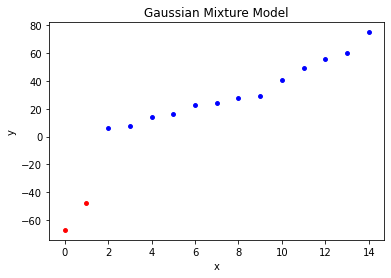

In [4]:
# 绘制观测数据的聚类情况
for i in range(0, len(labels)):
    if labels[i] == 0:
        plt.scatter(i, data.take(i), s=15, c='red')
    elif labels[i] == 1:
        plt.scatter(i, data.take(i), s=15, c='blue')
plt.title('Gaussian Mixture Model')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**第4步：自编程实现高斯混合模型的EM算法**

In [5]:
import numpy as np
import itertools


class MyGMM:
    def __init__(self, alphas_init, means_init, covariances_init, tol=1e-6, n_components=2, max_iter=50):
        # (1)设置参数的初始值
        # 分模型权重
        self.alpha_ = np.array(
            alphas_init, dtype="float16").reshape(n_components, 1)
        # 分模型均值
        self.mean_ = np.array(
            means_init, dtype="float16").reshape(n_components, 1)
        # 分模型标准差（方差的平方）
        self.covariances_ = np.array(
            covariances_init, dtype="float16").reshape(n_components, 1)
        # 迭代停止的阈值
        self.tol = tol
        # 高斯混合模型分量个数
        self.K = n_components
        # 最大迭代次数
        self.max_iter = max_iter
        # 观测数据
        self._y = None
        # 实际迭代次数
        self.n_iter_ = 0

    def gaussian(self, mean, convariances):
        """计算高斯分布概率密度"""
        return 1 / np.sqrt(2 * np.pi * convariances) * np.exp(
            -(self._y - mean) ** 2 / (2 * convariances))

    def update_r(self, mean, convariances, alpha):
        """更新r_jk 分模型k对观测数据yi的响应度"""
        r_jk = alpha * self.gaussian(mean, convariances)
        return r_jk / r_jk.sum(axis=0)

    def update_params(self, r):
        """更新u al si 每个分模型k的均值、权重、方差的平方"""
        u = self.mean_[-1]
        _mean = ((r * self._y).sum(axis=1) / r.sum(axis=1)).reshape(self.K, 1)
        _covariances = ((r * (self._y - u) ** 2).sum(axis=1) /
                        r.sum(axis=1)).reshape(self.K, 1)
        _alpha = (r.sum(axis=1) / self._y.size).reshape(self.K, 1)
        return _mean, _covariances, _alpha

    def judge_stop(self, mean, covariances, alpha):
        """中止条件判断"""
        a = np.linalg.norm(self.mean_ - mean)
        b = np.linalg.norm(self.covariances_ - covariances)
        c = np.linalg.norm(self.alpha_ - alpha)
        return True if np.sqrt(a ** 2 + b ** 2 + c ** 2) < self.tol else False

    def fit(self, y):
        self._y = np.copy(np.array(y))
        """迭代训练获得预估参数"""
        # (2)E步：计算分模型k对观测数据yi的响应度
        r = self.update_r(self.mean_, self.covariances_, self.alpha_)
        # 更新r_jk 分模型k对观测数据yi的响应度
        _mean, _covariances, _alpha = self.update_params(r)
        # 更新u al si 每个分模型k的均值、权重、方差的平方
        for i in range(self.max_iter):
            if not self.judge_stop(_mean, _covariances, _alpha):
                # (4)未达到阈值条件，重复迭代
                r = self.update_r(_mean, _covariances, _alpha)
                # (3)M步：计算新一轮迭代的模型参数
                _mean, _covariances, _alpha = self.update_params(r)
            else:
                # 达到阈值条件，停止迭代
                self.n_iter_ = i
                break

            self.mean_ = _mean
            self.covariances_ = _covariances
            self.alpha_ = _alpha

    def score(self):
        """计算该局部最优解的score，即似然函数值"""
        return (self.alpha_ * self.gaussian(self.mean_, self.covariances_)).sum()

In [6]:
# 观测数据
y = np.array([-67, -48, 6, 8, 14, 16, 23, 24, 28,
             29, 41, 49, 56, 60, 75]).reshape(1, 15)
# 预估均值和方差，以其邻域划分寻优范围
y_mean = y.mean() // 1
y_std = (y.std() ** 2) // 1

# 网格搜索，对不同的初值进行参数估计
alpha = [[i, 1 - i] for i in np.linspace(0.1, 0.9, 9)]
mean = [[y_mean + i, y_mean + j]
        for i in range(-10, 10, 5) for j in range(-10, 10, 5)]
covariances = [[y_std + i, y_std + j]
               for i in range(-1000, 1000, 500) for j in range(-1000, 1000, 500)]
results = []
for i in itertools.product(alpha, mean, covariances):
    init_alpha = i[0]
    init_mean = i[1]
    init_covariances = i[2]
    clf = MyGMM(alphas_init=init_alpha, means_init=init_mean, covariances_init=init_covariances,
                n_components=2, tol=1e-6)
    clf.fit(y)
    # 得到不同初值收敛的局部最优解
    results.append([clf.alpha_, clf.mean_, clf.covariances_, clf.score()])
# 根据score，从所有局部最优解找到相对最优解
best_value = max(results, key=lambda x: x[3])

print("alpha : {}".format(best_value[0].T))
print("mean : {}".format(best_value[1].T))
print("std : {}".format(best_value[2].T))

alpha : [[0.56950675 0.43049325]]
mean : [[27.41762854 12.35515017]]
std : [[ 268.17311145 2772.33989897]]


## 习题9.4
&emsp;&emsp;EM算法可以用到朴素贝叶斯法的非监督学习，试写出其算法。

**解答：**

**解答思路：**  
参考： http://www.cs.columbia.edu/~mcollins/em.pdf

1. 列出EM算法；
2. 列出朴素贝叶斯算法；
3. 推导朴素贝叶斯的EM算法。

**解答步骤：**

**第1步：EM算法**

&emsp;&emsp;根据书中第178页EM算法：
> 输入：观测变量数据$Y$，隐变量数据$Z$，联合分布$P(Y,Z|\theta)$，条件分布$P(Z|Y,\theta)$；  
输出：模型参数$\theta$。  
（1）选择参数的初值$\theta^{(0)}$，开始迭代；  
（2）E步：记$\theta^{(i)}$为第$i$次迭代参数$\theta$的估计值，在第$i+1$次迭代的E步，计算
> $$
\begin{aligned}
Q(\theta,\theta^{(i)}) &= E_Z[\log P(Y,Z | \theta)| Y,\theta^{(i)}] \\
&= \sum_z \log P(Y,Z | \theta) P(Z|Y,\theta^{(i)})
\end{aligned}
$$
> 这里，$P(Z|Y, \theta)$是在给定观测数据$Y$和当前的参数估计$\theta^{(i)}$下隐变量数据$Z$的条件概率分布；  
（3）M步：求使$Q(\theta, \theta^{(i)})$极大化的$\theta$，确定第$i+1$次迭代的参数的估计值$\theta^{(i+1)}$
> $$
\theta^{(i+1)} = \arg \max \limits_{\theta} Q(\theta, \theta^{(i)})
$$
>（4）重复第（2）步和第（3）步，直至收敛。

**第2步：朴素贝叶斯算法**

&emsp;&emsp;根据书中第62页朴素贝叶斯算法：
> 输入：训练数据$T={(x_1, y_1), (x_2, y_2), \cdots, (x_N, y_N)}$，其中$x_i=(x_i^{(1)}, x_i^{(2)}, \cdots, x_i^{(n)})^T$，$x_i^{(j)}$是第$i$个样本的第$j$个特征，$x_i^{(j)} \in \{a_{j1}, a_{j2},\cdots, a_{j S_j}\}$，$a_{jl}$是第$j$个特征可能取的第$l$个值，$j=1,2,\cdots, n$，$l=1,2,\cdots, S_j$，$y_i \in \{ c_1, c_2, \cdots, c_K\}$；实例$x$；  
输出：实例$x$的分类。  
（1）计算先验概率及条件概率
> $$
P(Y=c_k) = \frac{\displaystyle \sum_{i=1}^N I(y_i=c_k)}{N}, \quad k=1,2,\cdots, K \\
P(X^{(j)}=a_{jl}|Y=c_k)= \frac{\displaystyle \sum_{i=1}^N I(x_i^{(j)} = a_{jl}, y_i=c_k) }{\displaystyle \sum_{i=1}^N I(y_i=c_k)} \\
j=1,2,\cdots,n; \quad l=1,2,\cdots, S_j; \quad k=1,2,\cdots, K
$$  
>（2）对于给定的实例$x=(x^{(1)}, x^{(2)}, \cdots, x^{(n)})^T$，计算
> $$
P(Y=c_k) \prod_{j=1}^n P(X^{(j)}=x^{(j)} | Y=c_k), \quad k=1,2,\cdots,K
$$  
>（3）确定实例$x$的类
> $$
y = \arg \max \limits_{c_k} P(Y=c_k) \prod_{j=1}^n P(X^{(j)}=x^{(j)} | Y=c_k)
$$

**第3步：推导朴素贝叶斯的EM算法**

推导思路：
1. 假设隐变量数据是$y \in \mathcal{Y} = \{c_1, c_2, \cdots, c_K\}$
2. 设置初值，$P^{(0)}(Y=y) \geqslant 0$和$P_j^{(0)}(X=x|Y=y) \geqslant 0$，其中$j = 1,2,\cdots, n$，满足
$$
\sum_{y \in \mathcal{Y}} P^{(0)}(Y=y) = 1 \\
\sum_{x \in \{-1, +1\}} P_j^{(0)}(X=x|Y=y)=1
$$
3. 根据概率公式，可知概率
$$
\delta(y|i) = P(Y=y | X=x_i, \theta^{(t)}) = \frac
{\displaystyle P^{(t)}(Y=y) \prod_{j=1}^n P_j^{(t)}(X=x_i^{(j)} | Y=y) }
{\displaystyle \sum_{y \in \mathcal{Y}} P^{(t)}(Y=y) \prod_{j=1}^n P_j^{(t)}(X=x_i^{(j)} | Y=y)}
$$
其中$\theta$表示朴素贝叶斯模型中所有的参数向量
4. 迭代更新参数
$$
P^{(t+1)}(Y=y) = \frac{1}{N} \sum_{i=1}^N \delta(y | i) \\
P_j^{(t+1)}(X=x_i^{(j)} | y) = \frac
{\displaystyle \sum_{i=1}^N P(X=x_i^{(j)})\delta(y|i) }
{\displaystyle \sum_{i=1}^N \delta(y|i)}
$$
5. 计算似然函数，得到使得似然函数最大的$\theta$，重复第3步和第4步，直至收敛
$$
\begin{aligned}
\theta^* &= \arg \max \limits_{\theta \in \Omega} L(\theta) \\
&= \arg \max \limits_{\theta \in \Omega} \sum_{i=1}^N \sum_{y \in \mathcal{Y}} \delta(y|i) \log \left(P(Y=y) \prod_{j=1}^n P_j (X=x_i^{(j)} | Y=y)\right)
\end{aligned}
$$

所以，朴素贝叶斯的EM算法如下：

输入：隐变量数据是$y \in \mathcal{Y} = \{c_1, c_2, \cdots, c_K\}$，$x \in \mathcal{X} = (x_1, x_2, \cdots, x_N)$，输入空间$\mathcal{X} \subset R^n$为$n$维向量的集合，$x=(x^{(1)}, x^{(2)}, \cdots, x^{(n)})^T$，$x^{(i)}$取值范围是$\{-1, +1\}$；  
输出：参数$P^{(t+1)}(Y=y)$，$P_j^{(t+1)}(X=x_i^{(j)} | y)$；  
（1）选择参数的初值$P^{(0)}(Y=y) \geqslant 0$和$P_j^{(0)}(X=x|Y=y) \geqslant 0$，开始迭代；  
（2）E步：记$\theta^{(t)}$为第$t$次迭代参数$\theta$的估计值，在第$t+1$次迭代的E步，计算 $$
\delta(y|i) = P(Y=y | X=x_i, \theta^{(t)}) = \frac
{\displaystyle P^{(t)}(Y=y) \prod_{j=1}^n P_j^{(t)}(X=x_i^{(j)} | Y=y) }
{\displaystyle \sum_{y \in \mathcal{Y}} P^{(t)}(Y=y) \prod_{j=1}^n P_j^{(t)}(X=x_i^{(j)} | Y=y)}
$$ 
（3）M步：求使$Q(\theta, \theta^{(t)})$极大化的$\theta$，确定第$t+1$次迭代的参数的估计值
$$
P^{(t+1)}(Y=y) = \frac{1}{N} \sum_{i=1}^N \delta(y | i) \\
P_j^{(t+1)}(X=x_i^{(j)} | y) = \frac
{\displaystyle \sum_{i=1}^N P(X=x_i^{(j)})\delta(y|i) }
{\displaystyle \sum_{i=1}^N \delta(y|i)}
$$
（4）重复第（2）步和第（3）步，直至收敛。